### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [55]:
def text_bold(text):
    return f"\033[1m{text}\033[0m"

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [56]:
data = pd.read_csv('data/coupons.csv')

In [57]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [58]:
def gen_missing_df(df):
    total_missing_values = data.isnull().sum()
    percentage_of_missing = total_missing_values * 100 /len(data)
    missing_values_df= pd.DataFrame({'count': total_missing_values, "percentage":percentage_of_missing })
    return missing_values_df

missing_values_df= gen_missing_df(data)
missing_values_df[missing_values_df['count']>0]

,count,percentage
car,12576,99.148534
Bar,107,0.843582
CoffeeHouse,217,1.710817
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Restaurant20To50,189,1.490066


##### Observation
From the above table it is clear that car, Bar, CoffeeHouse, CarryAway,RestaurantLessThan20,Restaurant20To50 has null values, In those columns 'car' has around 99% missing values, we need to either drop this column or fill with some other values, considering it has 99% it would be ideal to delete this colum.

3. Decide what to do about your missing data -- drop, replace, other...

**Drop CAR colum**

In [59]:
#delete car feature/column from the dataframe
data.drop(columns=['car'], inplace=True)

**Fill missing values with mode**

In [60]:
#fill with Mode for the missing values in each column
def fill_missing_values(df,col):
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value,inplace=True)
    
most_flds_miss_values = missing_values_df[missing_values_df['count']>0].index.tolist()
for col in most_flds_miss_values:
    #since car column was deleted, no need to fill anything for that column
    if col !='car':
        fill_missing_values(data,col)

**Check for null values again**

In [61]:
missing_values_df= gen_missing_df(data)
missing_values_df[missing_values_df['count']>0]

,count,percentage


**Drop Duplicates**

In [62]:
print ("Number of rows before removing duplicates: " + text_bold(str(data.shape[0])))

Number of rows before removing duplicates: 12684


In [63]:
#deleting duplicates keeping the first occurance
data.drop_duplicates(inplace=True)

In [64]:
print ("Number of rows after removing duplicates: " + text_bold(str(data.shape[0])))

Number of rows after removing duplicates: 12610


4. What proportion of the total observations chose to accept the coupon?



In [65]:
coupons_count = data['Y'].value_counts()
fig= px.bar(x=coupons_count.index,y=coupons_count, title='Coupon Acceptance', color=coupons_count.index, text_auto=True)
fig.update_layout(xaxis_title='Acceptance Values',yaxis_title='Count',showlegend=True)
fig.show()

In [66]:
accepted_percentage = data.query("Y==1").shape[0]*100/data.shape[0]
print ("Percent of Accepted coupons is " + text_bold(str(accepted_percentage)))


Percent of Accepted coupons is 56.75654242664552


5. Use a bar plot to visualize the `coupon` column.

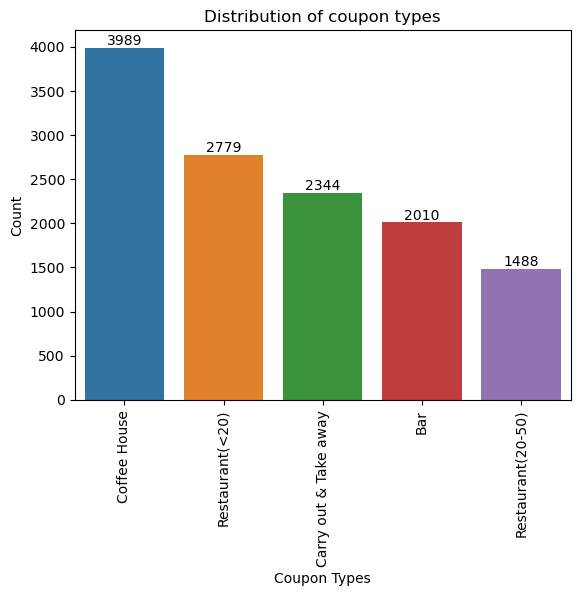

In [67]:
coupon_counts = data['coupon'].value_counts()
fig= sns.barplot(x=coupon_counts.index, y=coupon_counts.values)
plt.title('Distribution of coupon types')
plt.xlabel('Coupon Types')
plt.ylabel('Count')
plt.xticks(rotation = 90)
for container in fig.containers:
    fig.bar_label(container)
plt.savefig('images/coupon_counts.png')
plt.show()

6. Use a histogram to visualize the temperature column.

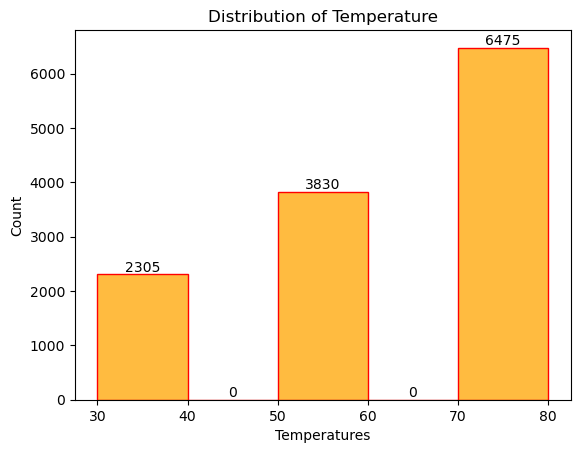

In [68]:
fig_temp=sns.histplot(data,x='temperature',bins=5,color="orange", edgecolor="red")
plt.title("Distribution of Temperature")
plt.ylabel("Count")
plt.xlabel("Temperatures")
for container in fig_temp.containers:
    fig_temp.bar_label(container)
plt.savefig('images/temparature_counts.png')
plt.show();

7. Use Pie Chart to show the weather colum

In [69]:
weather_count = data['weather'].value_counts()
px.pie(names=weather_count.index, values= weather_count.values, title='Weather Distribution')

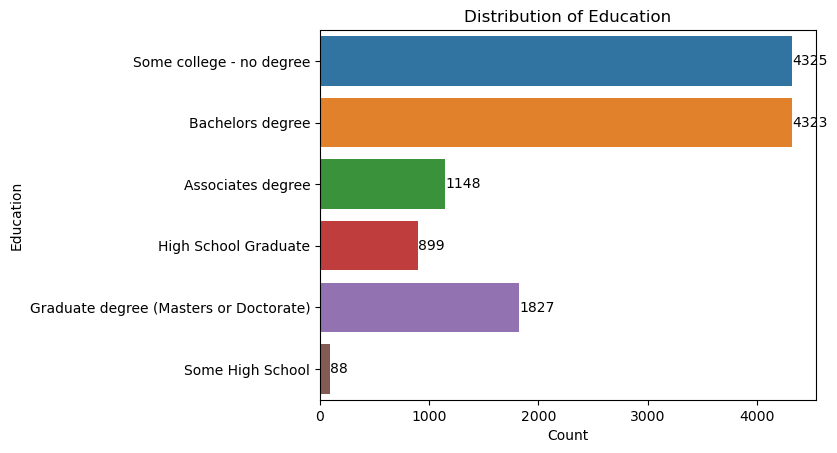

In [70]:
fig = sns.countplot(data=data, y='education')
plt.title("Distribution of Education")
plt.ylabel("Education")
plt.xlabel("Count")
for container in fig.containers:
    fig.bar_label(container)
plt.savefig('images/temparature_counts.png')
plt.show();

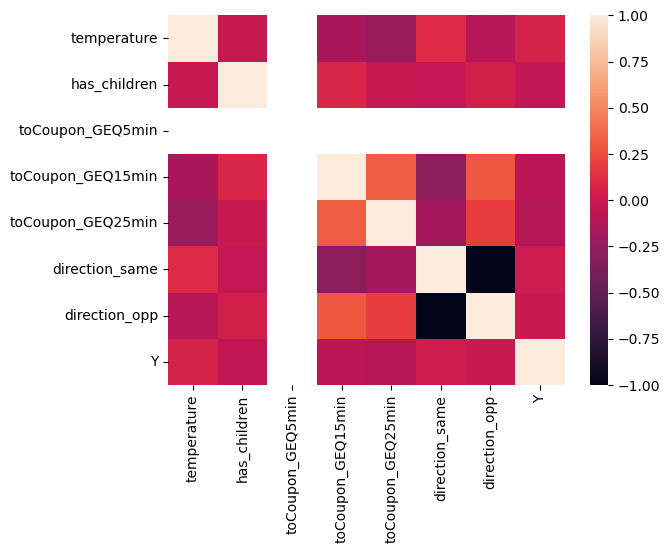

In [71]:
sns.heatmap(data.corr())
plt.show()

Observations from the above correlation matrix: direction_same & direction_opp are correlated, we can delete of them 
since the values of toCoupon_GEQ5min values are 1, there is no correlation with other features/columns

### Draw a histogram of coupon acceptancy by weather

In [72]:
val_counts_weather_with_y = data.groupby(['weather','Y']).size().reset_index(name="counts")
val_counts_weather_with_y

,weather,Y,counts
0,Rainy,0,645
1,Rainy,1,557
2,Snowy,0,738
3,Snowy,1,659
4,Sunny,0,4070
5,Sunny,1,5941


In [73]:
fig = px.histogram(val_counts_weather_with_y, x='weather',y='counts',color='Y',labels={'0': 'Rejected','1':'Accepted'},title='Weather Histogram')
fig.update_traces(name='Accepted', selector=dict(name='1'))
fig.update_traces(name='Rejected', selector=dict(name='0'))
fig.update_layout(
    legend=dict(
        title='Coupon Acceptance',
        x=0.5,  # Horizontal position
        y=1,    # Vertical position
        xanchor='right',  # Anchor point for x
        yanchor='top',     # Anchor point for y
        orientation='h',   # Horizontal orientation
        font=dict(
            family='Arial',
            size=12,
            color='black'
        ),
        bgcolor='rgba(255, 255, 255, 0.5)',  # Background color with transparency
        bordercolor='black',
        borderwidth=2
    )
)
fig.show()

**Observation**

People are accepting copons when its sunny

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [75]:
bar_df = data.query('coupon == "Bar"')
print ("Total rows in bar coupon data frame:  " + text_bold(str(bar_df.shape[0])))

Total rows in bar coupon data frame:  2010


2. What proportion of bar coupons were accepted?


In [76]:
accepted_bar_coupons = bar_df.query("Y==1")
accpted_bar_coupn_per = accepted_bar_coupons.shape[0]*100/bar_df.shape[0]
print ("Percent of Accepted bar coupons is " + text_bold(str(accpted_bar_coupn_per)))

Percent of Accepted bar coupons is 40.995024875621894


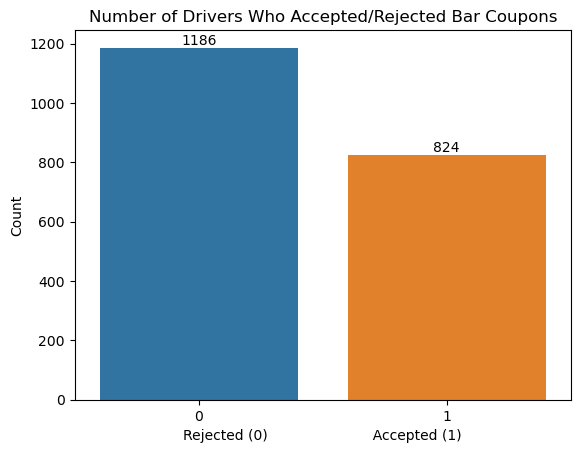

In [77]:
accepted_coupon_counts = bar_df['Y'].value_counts()
fig= sns.barplot(x=accepted_coupon_counts.index, y=accepted_coupon_counts.values)
plt.title("Number of Drivers Who Accepted/Rejected Bar Coupons")
plt.xlabel("Rejected (0)                        Accepted (1)")
plt.ylabel("Count")
for container in fig.containers:
    fig.bar_label(container)
plt.savefig('images/accepted_bar_coupon_counts.png')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [78]:
bar_df['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [79]:
less_than_3 = ['never', 'less1', '1~3']
per_acc_less_than_3 = accepted_bar_coupons.query('Bar in @less_than_3').shape[0] * 100/ bar_df.query('Bar in @less_than_3').shape[0]
per_acc_more_than_3 = accepted_bar_coupons.query('Bar not in @less_than_3').shape[0] * 100 / bar_df.query('Bar not in @less_than_3').shape[0]

print ("Percent of Accepted bar coupons for those who went less than 3 times : " + text_bold(str(per_acc_less_than_3)))
print ("Percent of Accepted bar coupons for those who went more than 3 times : " + text_bold(str(per_acc_more_than_3)))

Percent of Accepted bar coupons for those who went less than 3 times : 37.051352843732744
Percent of Accepted bar coupons for those who went more than 3 times : 76.88442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [80]:
bar_df['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [106]:
##Create two list for going to bar < 1 time & age less than 25
less_than_visited_once = ['never', 'less1']
less_than_age_25= ['below21','21']

#Drivers that are older than 25 and visited bar more than once
per_acc_more_one_age_grt_25= accepted_bar_coupons.query('Bar not in @less_than_visited_once & age not in @less_than_age_25').shape[0]*100/bar_df.query('Bar not in @less_than_visited_once & age not in @less_than_age_25').shape[0]
print ("Percent of Accepted Drivers that are older than 25 and visited bar more than once : " + text_bold(str(per_acc_more_one_age_grt_25)))

#Other Drivers that are younger than 25 and visited bar less than once
per_acc_less_one_age_less_25= accepted_bar_coupons.query('Bar in @less_than_visited_once & age in @less_than_age_25').shape[0]*100/bar_df.query('Bar in @less_than_visited_once & age in @less_than_age_25').shape[0]
print ("Percent of Accepted Drivers that are Younger than 25 and visited bar less than once : " + text_bold(str(per_acc_less_one_age_less_25)))

Percent of Accepted Drivers that are older than 25 and visited bar more than once : 69.52380952380952
Percent of Accepted Drivers that are Younger than 25 and visited bar less than once : 39.329268292682926


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [82]:
bar_df['passanger'].unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [83]:
bar_df['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [111]:
##Create two list for going to bar > 1 time & passengers that are not kid

greter_once_visited = ['1~3','4~8','gt8']
passenger_no_kid=['Alone', 'Friend(s)', 'Partner']

per_acc_bar_great_one_no_kid_other_farm = accepted_bar_coupons.query('Bar in @greter_once_visited & passanger in @passenger_no_kid & occupation !="Farming Fishing & Forestry"').shape[0] *100/bar_df.query('Bar in @greter_once_visited & passanger in @passenger_no_kid & occupation !="Farming Fishing & Forestry"').shape[0]
print ("Percent of Accepted Drivers that visited bar more than once without kid as passenger and other than Farming Fishing & Forestry occupation : " + text_bold(f"{per_acc_bar_great_one_no_kid_other_farm:.2f}") + "%")

per_acc_bar_less_one_with_kid_farm_occu = accepted_bar_coupons.query('Bar not in @greter_once_visited & passanger not in @passenger_no_kid & occupation =="Farming Fishing & Forestry"').shape[0] *100/bar_df.query('Bar not in @greter_once_visited & passanger not in @passenger_no_kid & occupation =="Farming Fishing & Forestry"').shape[0]
print ("Percent of Accepted Drivers that visited bar less than once with kid as passenger and does belongs to Farming Fishing & Forestry occupation : " + text_bold(f"{per_acc_bar_less_one_with_kid_farm_occu:.2f}" + "%"))


Percent of Accepted Drivers that visited bar more than once without kid as passenger and other than Farming Fishing & Forestry occupation : 71.32%
Percent of Accepted Drivers that visited bar less than once with kid as passenger and does belongs to Farming Fishing & Forestry occupation : 33.33%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [86]:
bar_df['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [87]:
bar_df['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [88]:
bar_df['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [112]:
#create a list for users goes to bar more than once
#greter_once_visited = ['1~3','4~8','gt8']

# create a list with no passenger as kid
passenger_no_kid=['Alone', 'Friend(s)', 'Partner']

# create a list with no widow as marital status
marital_status_no_window=['Unmarried partner', 'Single', 'Married partner', 'Divorced']

# create a list with age less than 30
age_status=['below21','21', '26']

#Create a list for going to cheap restaurants more than 4 times
cheap_resta_more_4 = ['4~8','gt8']

#Create a list for income less than 50K
income_less_50k = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']

bar_more1_no_kid_not_window = accepted_bar_coupons.query('Bar in @greter_once_visited & passanger in @passenger_no_kid and maritalStatus in @marital_status_no_window').shape[0]*100/bar_df.query('Bar in @greter_once_visited & passanger in @passenger_no_kid and maritalStatus in @marital_status_no_window').shape[0]
print ("Percent of Accepted Drivers that visited bar more than once a month, without kid as passenger and were not widowed : " + text_bold(f"{bar_more1_no_kid_not_window:.2f}") + "%")

bar_more1_under_age30 = accepted_bar_coupons.query('Bar in @greter_once_visited & age in @age_status').shape[0]*100/bar_df.query('Bar in @greter_once_visited & age in @age_status').shape[0]
print ("Percent of Accepted Drivers that visited bar more than once a month, and under the age of 30 : " + text_bold(f"{bar_more1_under_age30:.2f}")+ "%")

cheap_more4_income_less50 = accepted_bar_coupons.query('RestaurantLessThan20 in @cheap_resta_more_4 & income in @income_less_50k').shape[0]*100/bar_df.query('RestaurantLessThan20 in @cheap_resta_more_4 & income in @income_less_50k').shape[0]
print ("Percent of Accepted Drivers that visited cheap  restaurents more then 4 and income less than 50K : " + text_bold(f"{cheap_more4_income_less50:.2f}") + "%")


Percent of Accepted Drivers that visited bar more than once a month, without kid as passenger and were not widowed : 71.32%
Percent of Accepted Drivers that visited bar more than once a month, and under the age of 30 : 72.17%
Percent of Accepted Drivers that visited cheap  restaurents more then 4 and income less than 50K : 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Observations**

-41% coupons were accepted (821 out of 2010)

-Drivers who goes to bar less than 3 times in month tend to accept more coupons

-Older drivers who goes bar more tend to accept bar copuons

-Driver with adult passengers are most likely accept copuons

-Passengers who are not widoes are most likely accept coupons

-Drivers who goes to cheap restaurants and with less income tend to accept bar coupons, where as drivers with more income is not accepting bar coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigation on 'Coffee House' coupon acceptance**

In [101]:
coffee_df = data.query("coupon=='Coffee House'")
print ("Total rows in Coffee House coupon data frame:  " + text_bold(str(coffee_df.shape[0])))
accepted_coffee_coupons = coffee_df.query("Y==1")
accpted_coffee_coupn_per = accepted_coffee_coupons.shape[0]*100/coffee_df.shape[0]
print ("Percent of Accepted Coffee House coupons is " + text_bold(f"{accpted_coffee_coupn_per:.2f}" + "%"))

Total rows in Coffee House coupon data frame:  3989
Percent of Accepted Coffee House coupons is 49.86%


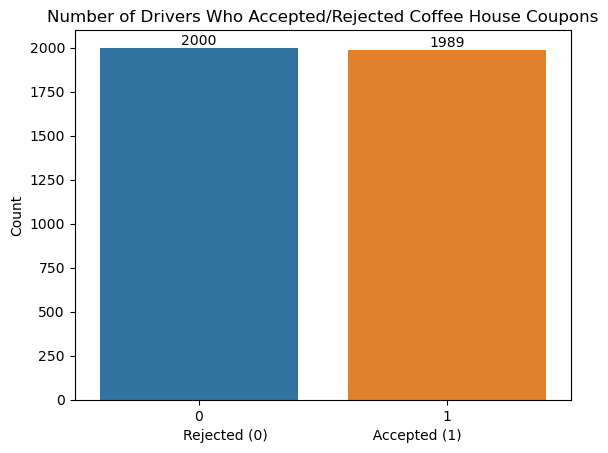

In [98]:
coffee_value_counts = coffee_df['Y'].value_counts()
fig= sns.barplot(x=coffee_value_counts.index, y=coffee_value_counts.values)
plt.title("Number of Drivers Who Accepted/Rejected Coffee House Coupons")
plt.xlabel("Rejected (0)                        Accepted (1)")
plt.ylabel("Count")
for container in fig.containers:
    fig.bar_label(container)
plt.savefig('images/accepted_Coffee_coupon_counts.png')
plt.show()

In [113]:
per_acc_less_than_3_coffee = accepted_coffee_coupons.query('CoffeeHouse in @less_than_3').shape[0] * 100/ coffee_df.query('CoffeeHouse in @less_than_3').shape[0]
per_acc_more_than_3_coffee = accepted_coffee_coupons.query('CoffeeHouse not in @less_than_3').shape[0] * 100 / coffee_df.query('CoffeeHouse not in @less_than_3').shape[0]

print ("Percent of Accepted Coffee House coupons for those who went less than 3 times : " + text_bold(f"{per_acc_less_than_3_coffee:.2f}" + "%"))
print ("Percent of Accepted Coffee House coupons for those who went more than 3 times : " + text_bold(f"{per_acc_more_than_3_coffee:.2f}" + "%"))


#Drivers that are older than 25 and visited bar more than once
per_acc_more_one_age_grt_25_coffee= accepted_coffee_coupons.query('CoffeeHouse not in @less_than_visited_once & age not in @less_than_age_25').shape[0]*100/coffee_df.query('CoffeeHouse not in @less_than_visited_once & age not in @less_than_age_25').shape[0]
print ("Percent of Accepted Drivers that are older than 25 and visited CoffeeHouse more than once : " + text_bold(f"{per_acc_more_one_age_grt_25_coffee:.2f}" + "%"))

#Other Drivers that are younger than 25 and visited bar less than once
per_acc_less_one_age_less_25_coffee= accepted_coffee_coupons.query('CoffeeHouse in @less_than_visited_once & age in @less_than_age_25').shape[0]*100/coffee_df.query('CoffeeHouse in @less_than_visited_once & age in @less_than_age_25').shape[0]
print ("Percent of Accepted Drivers that are Younger than 25 and visited CoffeeHouse less than once : " + text_bold(f"{per_acc_less_one_age_less_25_coffee:.2f}" + "%"))

coffee_more1_no_kid_not_window = accepted_coffee_coupons.query('CoffeeHouse in @greter_once_visited & passanger in @passenger_no_kid and maritalStatus in @marital_status_no_window').shape[0]*100/coffee_df.query('CoffeeHouse in @greter_once_visited & passanger in @passenger_no_kid and maritalStatus in @marital_status_no_window').shape[0]
print ("Percent of Accepted Drivers that visited CoffeeHouse more than once a month, without kid as passenger and were not widowed : " + text_bold(f"{coffee_more1_no_kid_not_window:.2f}") + "%")

coffee_more1_under_age30 = accepted_coffee_coupons.query('CoffeeHouse in @greter_once_visited & age in @age_status').shape[0]*100/coffee_df.query('CoffeeHouse in @greter_once_visited & age in @age_status').shape[0]
print ("Percent of Accepted Drivers that visited CoffeeHouse more than once a month, and under the age of 30 : " + text_bold(f"{coffee_more1_under_age30:.2f}")+ "%")


Percent of Accepted Coffee House coupons for those who went less than 3 times : 44.87%
Percent of Accepted Coffee House coupons for those who went more than 3 times : 67.50%
Percent of Accepted Drivers that are older than 25 and visited CoffeeHouse more than once : 63.81%
Percent of Accepted Drivers that are Younger than 25 and visited CoffeeHouse less than once : 35.65%
Percent of Accepted Drivers that visited CoffeeHouse more than once a month, without kid as passenger and were not widowed : 66.08%
Percent of Accepted Drivers that visited CoffeeHouse more than once a month, and under the age of 30 : 68.93%


**Observations**

-Coupon acceptance and rejection rates similar when it comes to coupon type of Coffee House

-Drivers who goes to Coffee House more than 3 times in month tend to accept more coupons

-Older drivers who goes bar more tend to accept Coffee coupons copuons

-Driver with adult passengers are most likely accept copuons

**Draw a count plot for each category column and get count for each type in column**

In [117]:
def getcolumnsbyType(coltype):
    coulms_bytype = data.select_dtypes(include=[coltype])
    return coulms_bytype.columns

category_columns = getcolumnsbyType('object')
integer_columns = getcolumnsbyType('int64')

In [118]:
print ("category columns: " + category_columns)

Index(['category colums: destination', 'category colums: passanger',
       'category colums: weather', 'category colums: time',
       'category colums: coupon', 'category colums: expiration',
       'category colums: gender', 'category colums: age',
       'category colums: maritalStatus', 'category colums: education',
       'category colums: occupation', 'category colums: income',
       'category colums: Bar', 'category colums: CoffeeHouse',
       'category colums: CarryAway', 'category colums: RestaurantLessThan20',
       'category colums: Restaurant20To50'],
      dtype='object')


In [119]:
data[category_columns].describe()

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1
freq,6266,7248,10011,3220,3989,7031,6469,2642,5068,4325,1861,2006,5285,3579,4795,5485,6230


In [133]:
def plot_count(columns,palette,typeval,norows,nocols):
    fig, axes = plt.subplots(norows, nocols, figsize=(20,60))
    axes = axes.flatten()

    for ax, col in zip(axes, columns):
        fig = sns.countplot(y=col, data=data, ax=ax, 
                      palette=palette, order=data[col].value_counts().index, hue='Y');
        for container in fig.containers:
            fig.bar_label(container)
        fig.set_title('counts for '+ col)
        

    plt.tight_layout()
    plt.show()
    plt.savefig('images/'+typeval+'_counts.png')

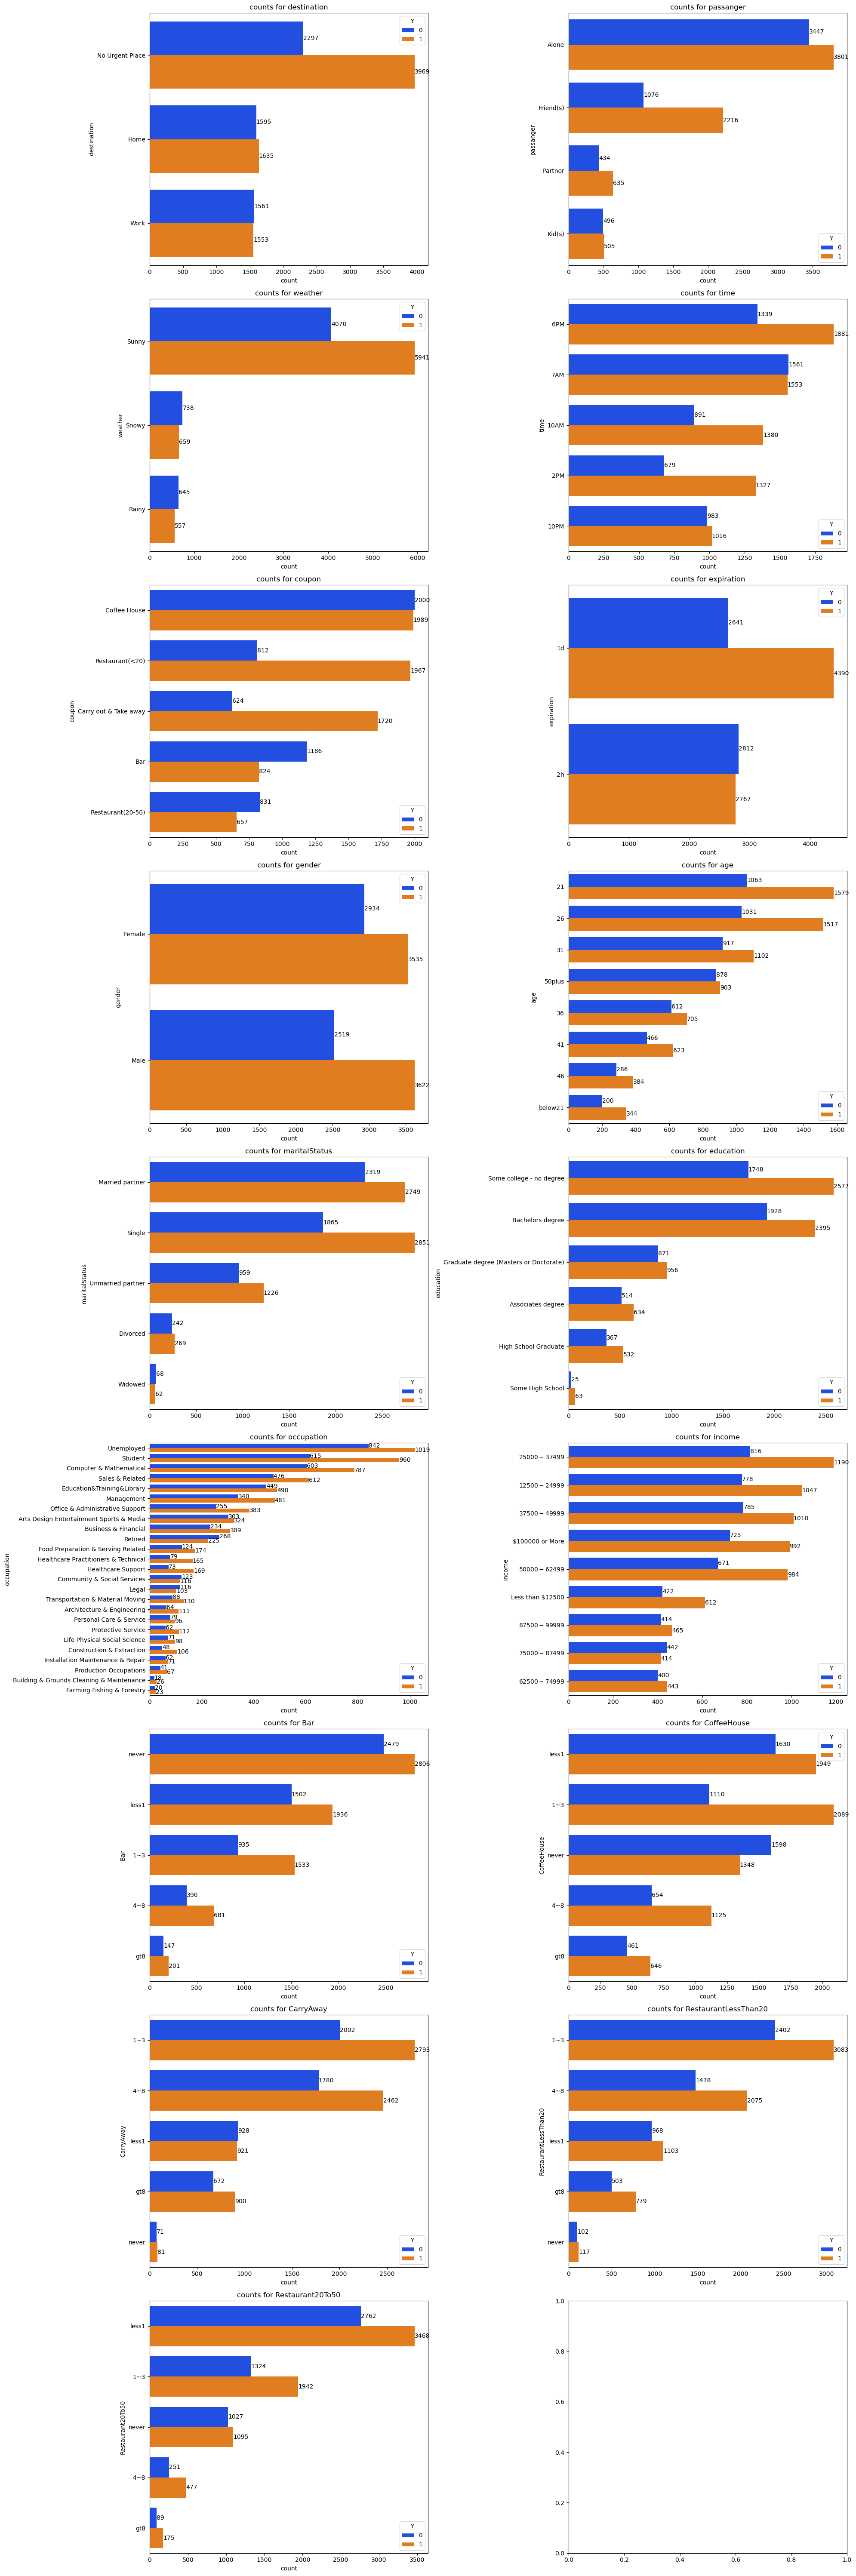

<Figure size 640x480 with 0 Axes>

In [134]:
plot_count(category_columns,'bright','category',9,2)

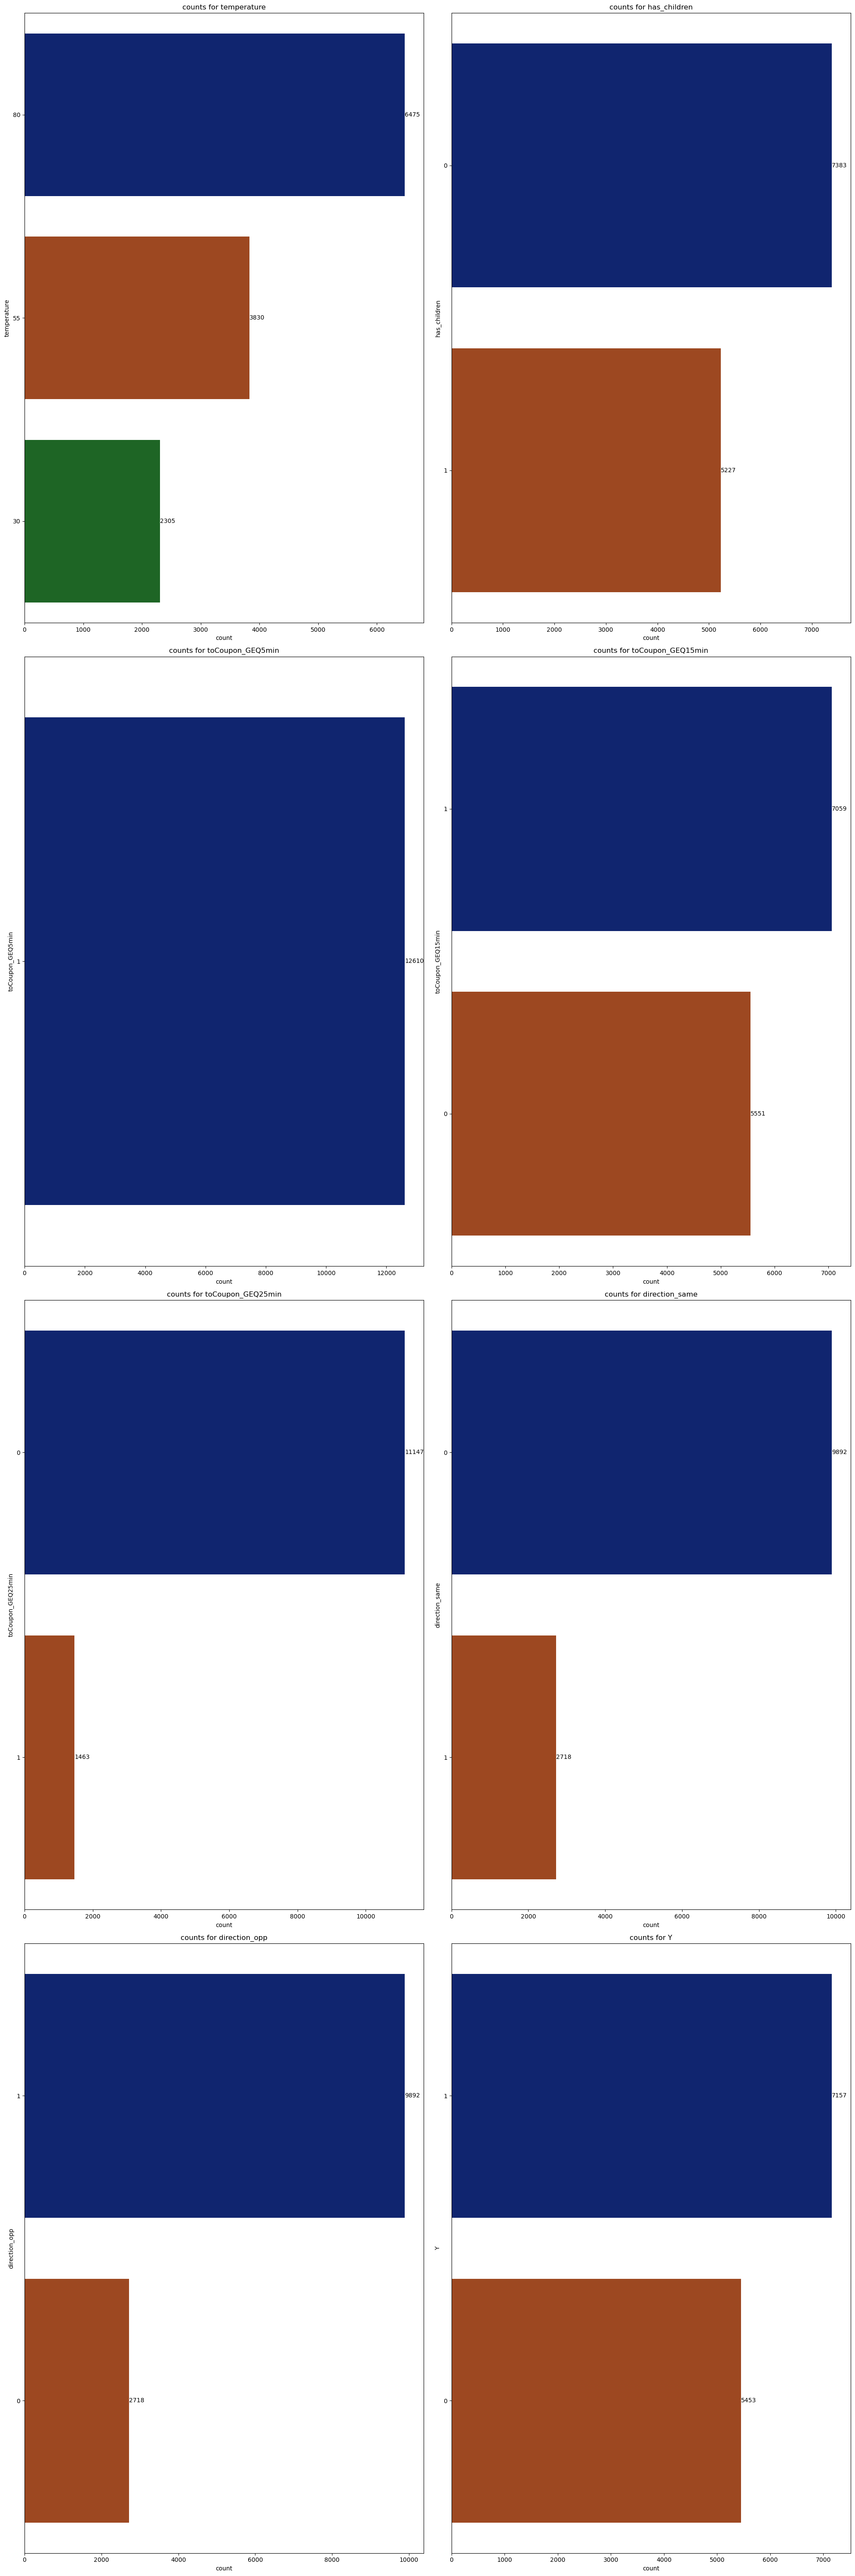

<Figure size 640x480 with 0 Axes>

In [132]:
plot_count(integer_columns,'dark','number',4,2)

#### Draw barcodes for a column with acceptance approval and rejection ####

In [137]:
def drawBar(col):
    df1= pd.DataFrame(sorted(list(data[col].unique())),columns=[col])
    df1['Total']= list(data.groupby(col)['Y'].count())
    df1['Accepted']= list(data[data['Y']==1].groupby(col)['Y'].count())
    df1['Percentage_Accepted']= round(df1['Accepted']/df1['Total']*100,3)
    df1['Rejected']= list(data[data['Y']==0].groupby(col)['Y'].count())
    df1['Percentage_Rejected']= round(df1['Rejected']/df1['Total']*100,3)
    df1 = df1.sort_values(by='Total', ascending=False)
    
    fig = plt.subplots(figsize =(15, 4))
    plt.barh(df1[col],df1['Total'],color='#ADD8E6')
    plt.barh(df1[col],df1['Accepted'], color='#2E6F40')
    plt.barh(df1[col],df1['Rejected'], color='#FF0000')
    plt.legend(labels=['Total','Accepted','Rejected'])
    plt.xlabel('Counts')
    plt.title(col+' wise accepted coupons')
    plt.savefig('images/'+col+'_acceptance_patterns.png')
    plt.show()
    
    return df1

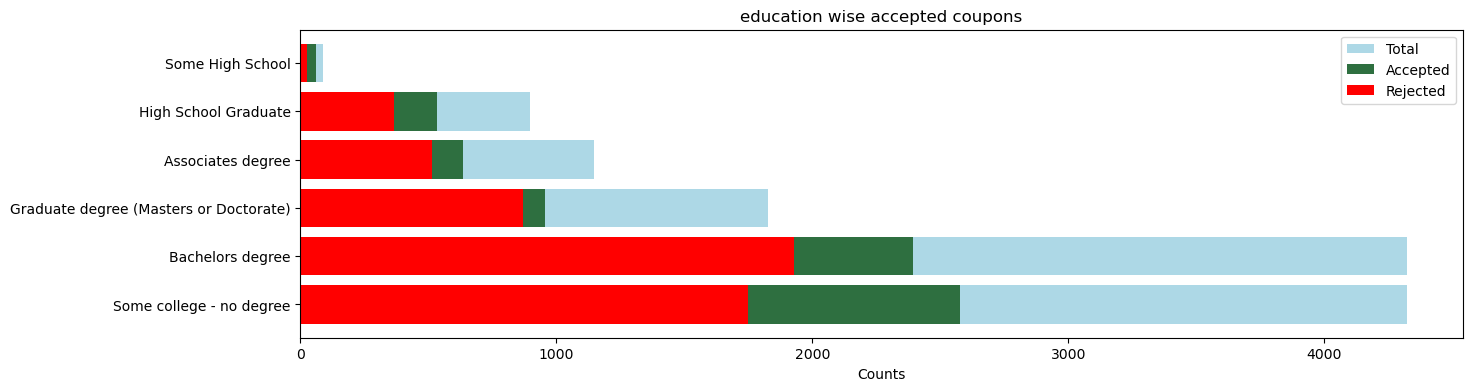

,education,Total,Accepted,Percentage_Accepted,Rejected,Percentage_Rejected
5,Some college - no degree,4325,2577,59.584,1748,40.416
1,Bachelors degree,4323,2395,55.401,1928,44.599
2,Graduate degree (Masters or Doctorate),1827,956,52.326,871,47.674
0,Associates degree,1148,634,55.226,514,44.774
3,High School Graduate,899,532,59.177,367,40.823
4,Some High School,88,63,71.591,25,28.409


In [138]:
drawBar('education')

***Observation***

Drivers with some or no college degree tend accept coupons

Drivers with any degree tend to reject coupons (may be they have more salary :))

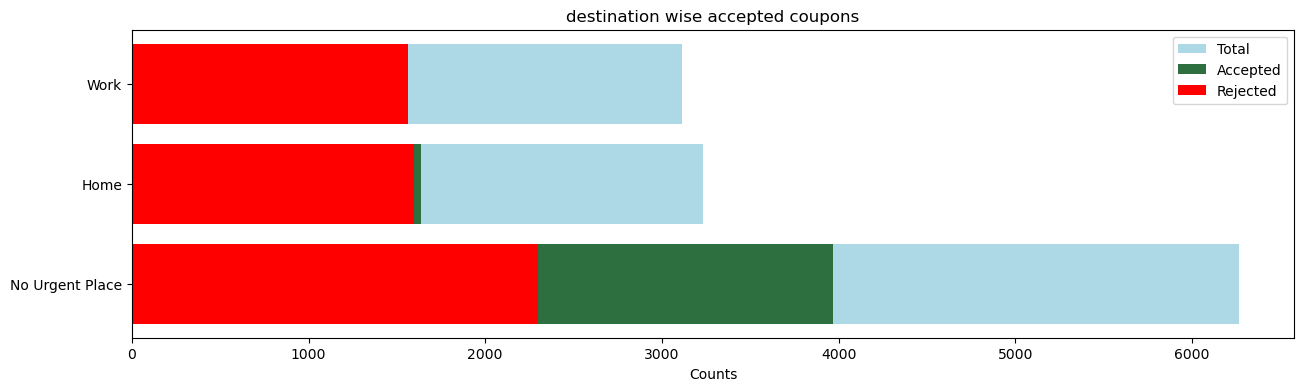

,destination,Total,Accepted,Percentage_Accepted,Rejected,Percentage_Rejected
1,No Urgent Place,6266,3969,63.342,2297,36.658
0,Home,3230,1635,50.619,1595,49.381
2,Work,3114,1553,49.872,1561,50.128


In [139]:
drawBar('destination')

***Observation***

Drivers that are destined towards home or work have similar patterns when it comes to acceptance & rejection of coupons